In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('images\Sentences\id_pg2.jpg')
image_copy = image.copy()

(1321, 47, 36, 34)
(1278, 47, 5, 5)
(1098, 47, 259, 259)
(1142, 47, 4, 5)
(1098, 47, 34, 34)
(1137, 67, 5, 5)
(1146, 77, 5, 4)
(617, 80, 19, 28)
(597, 80, 18, 29)
(575, 80, 18, 29)
(552, 80, 19, 28)
(540, 80, 11, 29)
(521, 80, 18, 29)
(500, 80, 12, 28)
(486, 80, 11, 29)
(467, 80, 18, 29)
(444, 80, 19, 28)
(356, 80, 18, 28)
(317, 80, 5, 5)
(289, 80, 23, 28)
(263, 80, 13, 28)
(146, 80, 23, 28)
(328, 81, 24, 28)
(194, 81, 11, 27)
(1326, 86, 31, 39)
(1098, 86, 19, 10)
(240, 87, 20, 21)
(207, 87, 19, 22)
(173, 87, 18, 21)
(431, 88, 5, 5)
(317, 88, 5, 20)
(1302, 101, 39, 29)
(431, 103, 5, 5)
(443, 164, 28, 28)
(266, 164, 26, 29)
(232, 164, 19, 28)
(174, 164, 5, 28)
(146, 164, 23, 28)
(473, 168, 19, 20)
(360, 171, 19, 29)
(312, 171, 20, 21)
(297, 171, 12, 21)
(208, 171, 20, 21)
(184, 171, 20, 21)
(431, 172, 5, 5)
(336, 172, 18, 21)
(1098, 179, 9, 9)
(431, 187, 5, 5)
(649, 249, 5, 5)
(623, 249, 5, 5)
(554, 249, 18, 28)
(484, 249, 22, 29)
(446, 249, 23, 28)
(309, 249, 22, 28)
(266, 249, 5, 10)


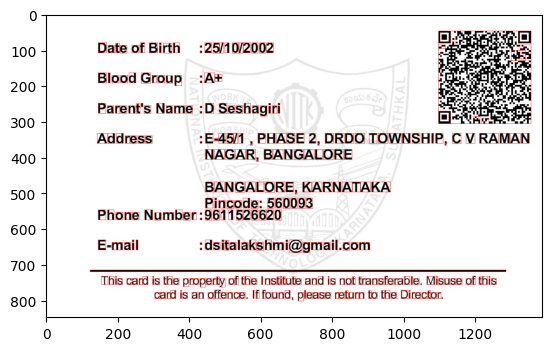

In [3]:
gray = cv2.cvtColor (image_copy, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold (gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_dist = 30

min_dist_x = 30

# Sort contours by y-values of the bounding rectangle
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

for c in contours:
    print(cv2.boundingRect(c))
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x,y),(x+w,y+h),(255,0,0))
plt.imshow(image)
plt.show()

# Group contours based on y-values with a minimum distance for x-values
sorted_contours = []
current_group = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if not current_group:
        current_group.append((contour, x))
    else:
        prev_contour, prev_x = current_group[-1]
        if abs(y - cv2.boundingRect(prev_contour)[1]) <= min_dist:
            current_group.append((contour, x))
        else:
            sorted_group = sorted(current_group, key=lambda c: c[1])
            
            current_group = [(contour, x)]

            sorted_group_word = []
            sorted_group_word_list = [cv2.boundingRect(sorted_group[0][0])]

            for i in range (1, len(sorted_group)):
                prev_contour, prev_x = sorted_group[i-1]
                _, _, prev_w, _ = cv2.boundingRect(prev_contour)
                x, y, w, h = cv2.boundingRect(sorted_group[i][0])

                if abs(prev_x + prev_w - x)<=min_dist_x:
                    sorted_group_word_list.append(cv2.boundingRect(sorted_group[i][0]))
                else:
                    sorted_group_word.append(sorted_group_word_list)
                    sorted_group_word_list= [cv2.boundingRect(sorted_group[i][0])]
                
            sorted_group_word.append(sorted_group_word_list)

            sorted_contours.append(sorted_group_word)

# Append the last group of contours
if current_group:
    sorted_group = sorted(current_group, key=lambda c: c[1])


    sorted_group_word = []
    sorted_group_word_list = [cv2.boundingRect(sorted_group[0][0])]

    for i in range (1, len(sorted_group)):
        prev_contour, prev_x = sorted_group[i-1]
        _, _, prev_w, _ = cv2.boundingRect(prev_contour)
        x, y, w, h = cv2.boundingRect(sorted_group[i][0])

        if abs(prev_x + prev_w - x)<=min_dist_x:
            sorted_group_word_list.append(cv2.boundingRect(sorted_group[i][0]))
        else:
            sorted_group_word.append(sorted_group_word_list)
            sorted_group_word_list = [cv2.boundingRect(sorted_group[i][0])]
        
    sorted_group_word.append(sorted_group_word_list)

    sorted_contours.append(sorted_group_word)



In [ ]:
print(sorted_contours)

In [ ]:
for line in sorted_contours:
    print('new sentence')
    for word in line:
        print('new word')
        for letter in word:
            print('new letter')
            print(letter)

In [ ]:
for line in sorted_contours:
    print('new sentence')
    for word in line:
        print('new word')
        for letter in word:
            #plt.imshow(image_copy[letter[1]:letter[1]+letter[3],letter[0]:letter[0]+letter[2]])
            plt.show()

In [ ]:
sentence_list = []
line_list = []
word_list = []

for line in sorted_contours:
    for word in line:
        for letter_cont_rect in word:
            word_list.append(image_copy[letter_cont_rect[1]:(letter_cont_rect[1]+letter_cont_rect[3]), letter_cont_rect[0]:letter_cont_rect[0]+letter_cont_rect[2]])
        line_list.append (word_list)
        word_list = []
    sentence_list.append(line_list)
    line_list = []

In [ ]:
width = 50
height = 50

word_group_list = []
sentence_group_list = []

for line in range(len(sentence_list)):
    for word in range(len(sentence_list[line])):
        for letter in range(len(sentence_list[line][word])):
            sentence_list[line][word][letter] = cv2.resize(sentence_list[line][word][letter], (width, height))

            sentence_list[line][word][letter] = cv2.copyMakeBorder(sentence_list[line][word][letter], 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=(255,255,255))

            plt.imshow(sentence_list[line][word][letter])
            plt.show()
            
        indiv_word = cv2.hconcat( sentence_list[line][word])

        if word != len(sentence_list[line])-1:
            indiv_word = cv2.copyMakeBorder(indiv_word,0, 0, 0, 40, cv2.BORDER_CONSTANT, value=(255,255,255) )

        plt.imshow(indiv_word)
        plt.show()
        

        word_group_list.append (indiv_word)
    
    indiv_sentence = cv2.hconcat(word_group_list)
    sentence_group_list.append(indiv_sentence)
    word_group_list = []
    

for sentence in range(len(sentence_group_list)):
    sentence_group_list[sentence] = cv2.resize(sentence_group_list[sentence], (600, 50))
    
    if (sentence != len(sentence_group_list)-1):
        sentence_group_list[sentence] = cv2.copyMakeBorder(sentence_group_list[sentence],0,50,0,0,cv2.BORDER_CONSTANT, value=(255,255,255))

    plt.imshow(sentence_group_list[sentence])
    plt.show()

para = cv2.vconcat(sentence_group_list)


plt.imshow(para)
plt.show()

        